<a href="https://colab.research.google.com/github/riken-emar/NNSC/blob/main/spams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spams

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for spams: filename=spams-2.6.5.4-cp37-cp37m-linux_x86_64.whl size=3236610 sha256=e8b5efa28f824db5f267c0234045581b0cceb6324ecaded88525179340a2540a
  Stored in directory: /root/.cache/pip/wheels/5e/92/17/e718e0e26bfcdd7e81afcf874ac2bc599dd7dd7f3ad78f9d76
Successfully built spams


In [2]:
pip install nmrglue

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 5.2 MB/s 


In [3]:
pip install nimfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.3 MB/s 


In [4]:
from scipy.fftpack import fft, ifft
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib.cm
import nmrglue as ng
import numpy as np
import pandas as pd
from numpy.random import randn
import csv
import cmath
import math
import tkinter
from matplotlib.backends.backend_tkagg  import FigureCanvasTkAgg, NavigationToolbar2Tk
from tkinter import messagebox
import spams
import nimfa
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('/MIX1.txt', sep='\t')
df

,3.1664,3.16835,3.17029,3.17224,3.17419,3.17613,3.17808,3.18002,3.18197,3.18391,...,3.28121,3.28315,3.2851,3.28704,3.28899,3.29094,3.29288,3.29483,3.29677,3.29872
0,5.090415,5.260472,5.456454,6.129976,6.942296,6.881316,6.297407,6.124968,6.653713,6.920085,...,1.769218,1.121643,0.733640,0.542814,0.455569,0.721731,0.767994,0.504716,0.329636,0.000000
1,4.476456,4.953048,4.841054,4.485274,4.386918,4.247256,4.041224,3.873548,4.377473,5.161606,...,1.371319,1.531545,1.288992,0.802446,0.267312,0.000000,0.067451,0.082412,0.228070,0.585408
2,1.236961,1.462762,1.381018,1.567165,1.805469,2.577937,3.359899,3.781495,4.420261,5.139223,...,0.444809,0.354891,0.152666,0.094735,0.000000,0.290607,0.554262,0.782459,0.999301,0.843966
3,4.293334,4.801160,5.257647,5.696826,5.821155,5.552598,5.318716,5.454080,5.485157,5.432511,...,2.110041,2.192759,1.736453,1.111093,0.591668,0.451077,0.260112,0.000000,0.091975,0.275993
4,1.250193,1.313970,1.100515,1.091628,1.107621,1.129035,1.711848,2.704307,3.940694,5.051626,...,1.335701,1.263939,0.968785,0.612123,0.602039,0.602430,0.452924,0.132107,0.000000,0.214759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2.090863,2.220441,2.473045,2.706976,2.929552,3.304833,3.994667,4.787096,5.371663,5.682280,...,0.153243,0.000000,0.027697,0.405036,0.690823,0.566011,0.580986,0.973617,1.488348,1.433013
120,2.305920,2.671343,3.042704,3.492660,4.059087,4.202489,4.305121,4.413227,4.194433,4.145789,...,0.340220,0.356128,0.565596,0.351648,0.512764,0.742815,0.958919,0.665460,0.000000,0.009768
121,2.394440,2.352693,2.608748,2.926875,3.085767,3.092213,3.165207,3.255510,3.250418,3.311534,...,1.667882,2.003479,2.012421,2.007905,1.925265,1.489100,0.882552,0.595303,0.347269,0.000000
122,3.436019,3.659596,3.856616,4.139911,4.352348,4.463763,4.501491,4.793943,5.168050,5.628674,...,1.921261,1.645193,1.060492,0.539762,0.404457,0.299188,0.095510,0.000000,0.089920,0.405620


In [13]:
df.values

array([[5.09041536, 5.2604716 , 5.45645425, ..., 0.50471611, 0.32963612,
        0.        ],
       [4.47645643, 4.95304845, 4.84105361, ..., 0.08241249, 0.22807001,
        0.58540824],
       [1.23696067, 1.46276184, 1.38101845, ..., 0.78245947, 0.99930073,
        0.84396617],
       ...,
       [2.39444005, 2.35269295, 2.60874846, ..., 0.5953025 , 0.34726889,
        0.        ],
       [3.43601932, 3.65959637, 3.85661592, ..., 0.        , 0.08991974,
        0.40561982],
       [0.89324726, 0.93304937, 1.05384766, ..., 0.27509264, 0.09583358,
        0.        ]])

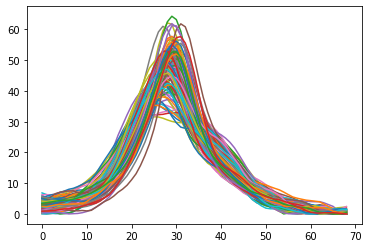

In [14]:
fig = plt.figure()
plt.plot(df.values.T)
plt.show()

rank 3
['W1', 'H1', 'W2', 'H2', 'W3', 'H3']
0


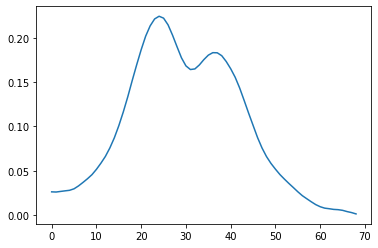

1


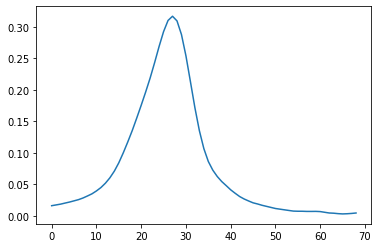

2


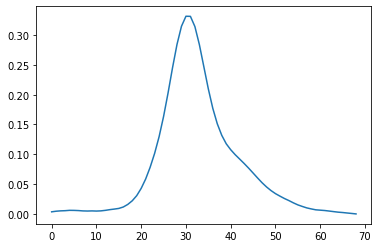

0


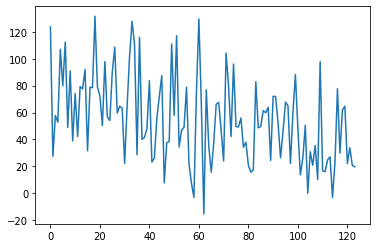

1


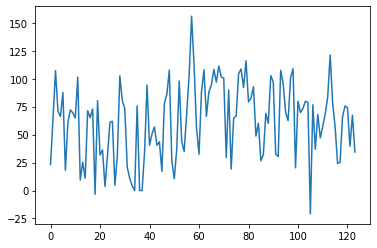

2


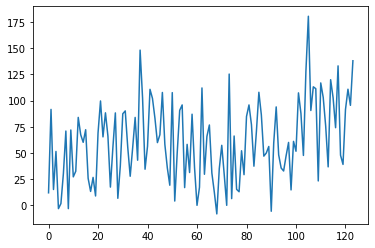

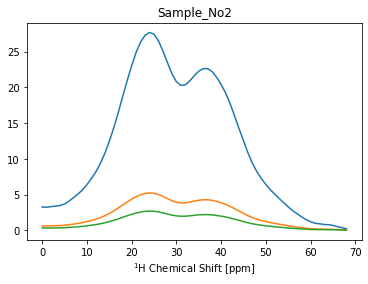

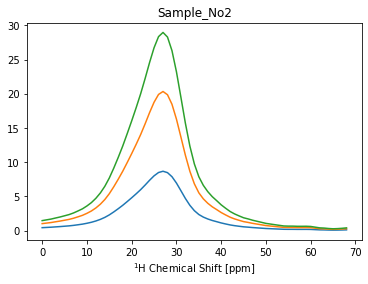

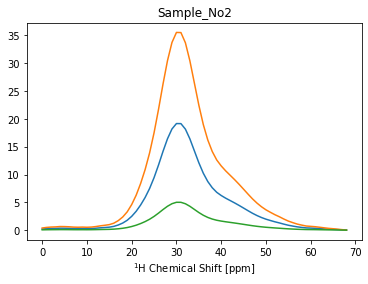

'\n     header=[]\n     for a in range(i):\n       header.append("component_"+str(a+1))\n     print(header)\n     if n ==0:\n       df_concat2 = pd.DataFrame(dotWH)\n     else:\n       df2 = pd.DataFrame(dotWH)\n       df_concat2 = pd.concat([df_concat2,df2],axis=1)\n     header2=[]\n     for a in range(i):\n       header2.append("SeparatedComponent_"+str(a+1))\n     print(header)\n     #df_concat2.to_csv(datafilename2, header=header2)\n'

In [52]:
minrank = 3
maxrank = 4
X = np.asfortranarray(df.values.T)
import datetime
now = datetime.datetime.now()
for i in range(minrank,maxrank):
    print("rank", i)
    (U,V) =spams.nnsc(X, K=i,return_lasso= True,lambda1=1,iter=100)
    W = U
    H = V
    datafilename1 = "/output/output_rank" +str(i)+"_"+now.strftime('%Y%m%d_%H%M%S') +".csv"
    df1 = pd.DataFrame(W)
    df2 = pd.DataFrame(H.todense().T)
    df_concat1 = pd.concat([df1,df2],axis=1)
    header=[]
    for a in range(i):
     header.append("W"+str(a+1))
     header.append("H"+str(a+1))
    print(header)
    df_concat1.to_csv(datafilename1,header=header)
    for k in range(i):
     print(k)
     fig = plt.figure()
     plt.plot(W[:,k])
     filename1 = "/output/W_rank_"+str(i)+"_comp_"+ str(k+1) +"_"+now.strftime('%Y%m%d_%H%M%S') + ".png"
     fig.savefig(filename1)
     plt.show()
    for l in range(i):
     print(l)
     fig = plt.figure()
     plt.plot(H.todense().T[:,l])
     filename2 = "/output/H_rank_"+str(i)+"_comp_"+ str(l+1) +"_"+now.strftime('%Y%m%d_%H%M%S') + ".png"
     fig.savefig(filename2)
     plt.show()
    datafilename2 = "/output/separation_rank_" +str(i)+"_"+now.strftime('%Y%m%d_%H%M%S') +".csv"
"""
    separation = []
    fig = plt.figure()
    for n in range(i):
     A=np.array(H.todense())
     #print(A)
     filename3 = "/output/separation_rank_"+str(i)+"_"+now.strftime('%Y%m%d_%H%M%S') + ".png"
     for z in range(0,len(A)):
      dotWH=np.dot(W[:,n],A[z,n])
      plt.plot(dotWH)
      plt.title("Sample_No"+str(z))
      plt.xlabel('$^{1}$H Chemical Shift [ppm]')
      fig.savefig(filename3)
     plt.show()
"""
"""
     header=[]
     for a in range(i):
       header.append("component_"+str(a+1))
     print(header)
     if n ==0:
       df_concat2 = pd.DataFrame(dotWH)
     else:
       df2 = pd.DataFrame(dotWH)
       df_concat2 = pd.concat([df_concat2,df2],axis=1)
     header2=[]
     for a in range(i):
       header2.append("SeparatedComponent_"+str(a+1))
     print(header)
     #df_concat2.to_csv(datafilename2, header=header2)
"""